In [37]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [38]:
pd.set_option("display.max_columns",100)

In [39]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\fifa\players_22.csv")

C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
df["dob"]=pd.to_datetime(df["dob"])

In [41]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

### find number of leagues and teams 

In [42]:
df.club_name.nunique()

701

In [43]:
df.league_name.nunique()

55

# plot the distribution of player value, wage, height, weight, overall rating,age

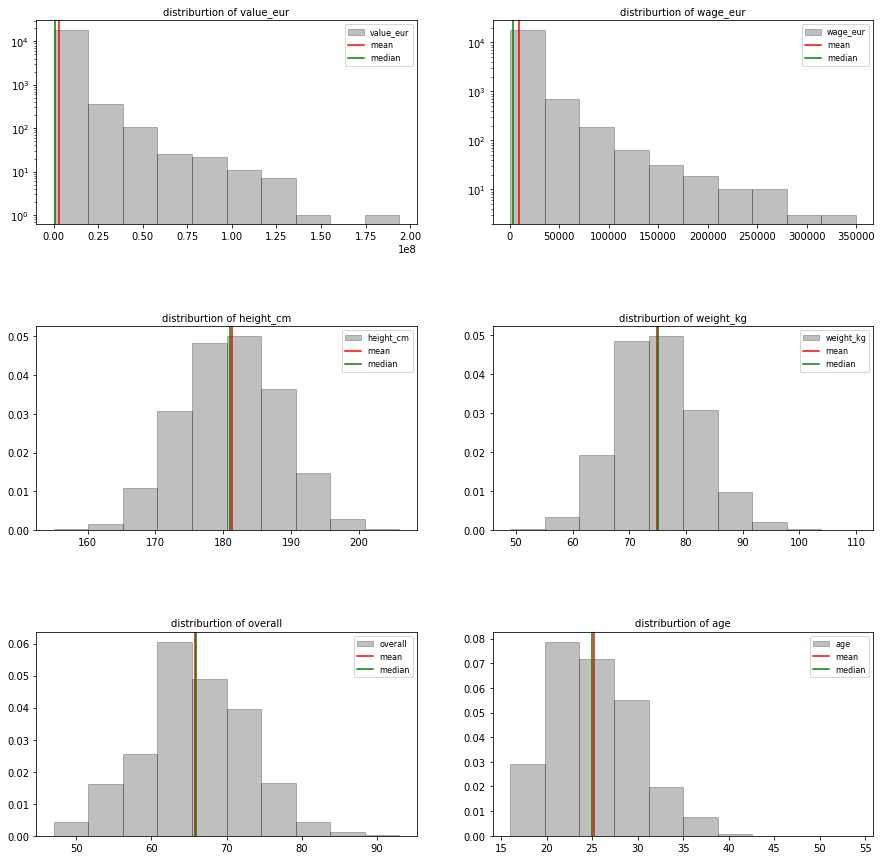

In [44]:
fig,axes=plt.subplots(3,2,figsize=(15,15))
columns=["value_eur","wage_eur","height_cm","weight_kg","overall","age"]
for ax, col in zip(axes.ravel(),columns):
    if col in ["value_eur","wage_eur"]:
        ax.hist(df[col],ec="k",log=True,color="k",alpha=0.25,label=col)
        ax.axvline(df[col].mean(),label="mean",color="r")
        ax.axvline(df[col].median(),label="median",color="g")
        ax.legend(fontsize=8)
    else:
        ax.hist(df[col],ec="k",density=True,color="k",alpha=0.25,label=col)
        ax.axvline(df[col].mean(),label="mean",color="r")
        ax.axvline(df[col].median(),label="median",color="g")
        ax.legend(fontsize=8)
    ax.set_title("distriburtion of "+col,size=10)
    plt.subplots_adjust(hspace=0.5)
plt.show()

# find if there is any correlation between columns

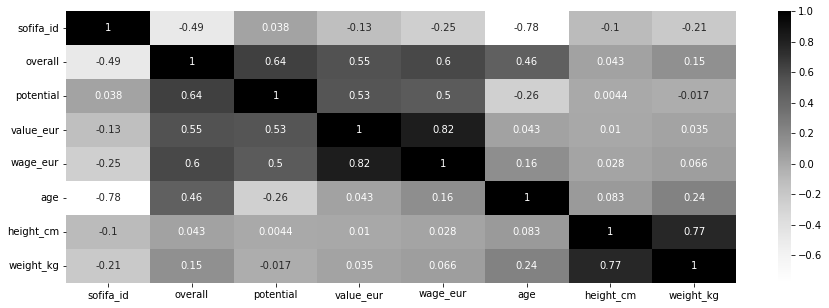

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(df.iloc[:,:13].corr(),annot=True,cmap="Greys")
plt.show()

# plot top 10 clubs with the highest overall rating

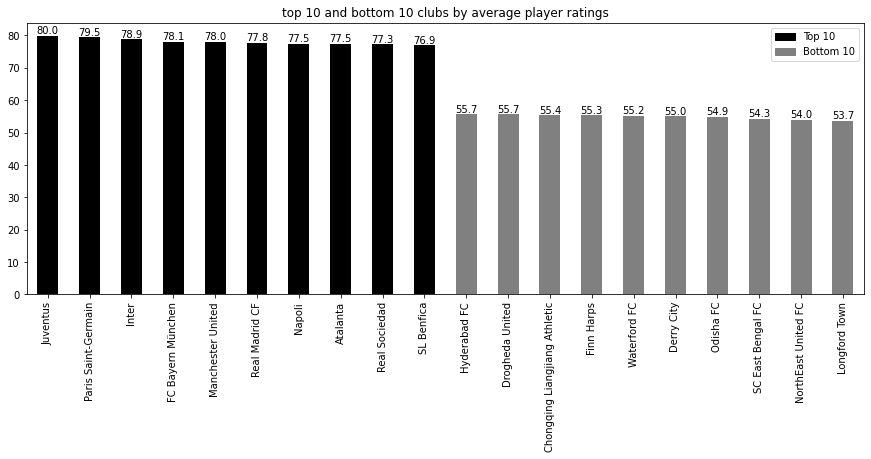

In [85]:
grouped_top=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False).head(10)
grouped_bottom=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False).tail(10)
unioned=pd.concat([grouped_top,grouped_bottom])
ax=unioned.plot(kind="bar",x="club_name",y="overall",xlabel="",figsize=(15,5),color=[*['k']*len(grouped_top.club_name), *['grey']*len(grouped_bottom.club_name)])
plt.title("top 10 and bottom 10 clubs by average player ratings")
legends = [
    matplotlib.patches.Patch(color="k", label="Top 10"),
    matplotlib.patches.Patch(color="grey", label="Bottom 10"),
]
ax.legend(handles=legends, prop={"size": 10})
def value_labels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y.iloc[i],1),round(y.iloc[i],1), size=10, ha="center",va="bottom")
value_labels(unioned.club_name,unioned.overall)

plt.show()

# find 10 leagues with highest footballer salaries

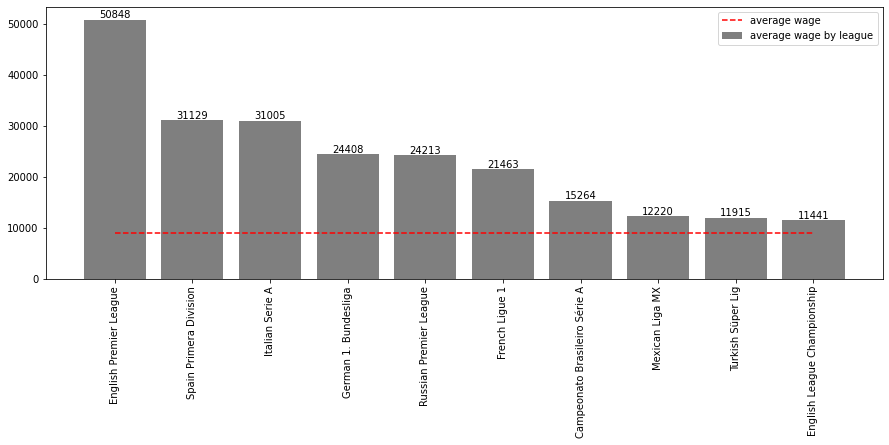

In [83]:
grouped=df.groupby("league_name")["wage_eur"].mean().reset_index().sort_values("wage_eur",ascending=False).head(10)
grouped["average_salary"]=df.wage_eur.mean()
plt.figure(figsize=(15,5))
plt.bar(grouped.league_name,grouped.wage_eur,color="k",alpha=.5,label="average wage by league")
plt.plot(grouped.league_name,grouped.average_salary,color="r",ls="--",label="average wage")
plt.legend()
plt.xticks(rotation=90)
def value_counts(y):
    for i in range(len(y)):
        plt.text(i,round(y.iloc[i]),round(y.iloc[i]),size=10,ha="center",va="bottom")
value_counts(grouped.wage_eur)
plt.show()

# most common positions

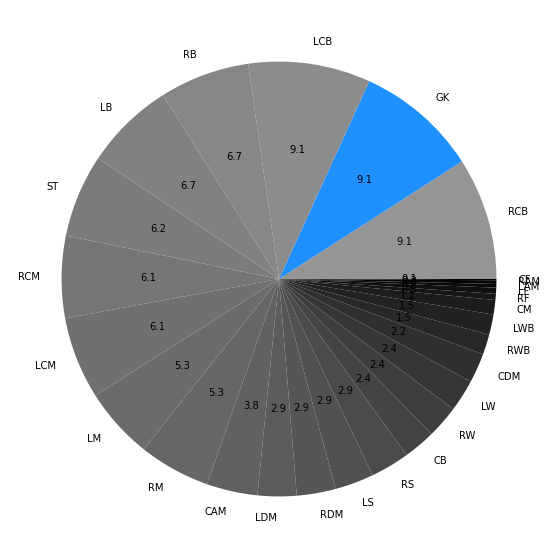

In [12]:
values=df.club_position.value_counts(sort=True).reset_index()[2:]
cmap=plt.get_cmap("Greys")
colors=list(cmap(np.linspace(0.5,1,len(values["index"]))))
colors[1]="dodgerblue"
plt.figure(figsize=(10,10))
plt.pie(values.club_position,labels=values["index"],autopct="%1.1f",colors=colors)
plt.show()

# plot top 10 league with the highest rated goalkeepers

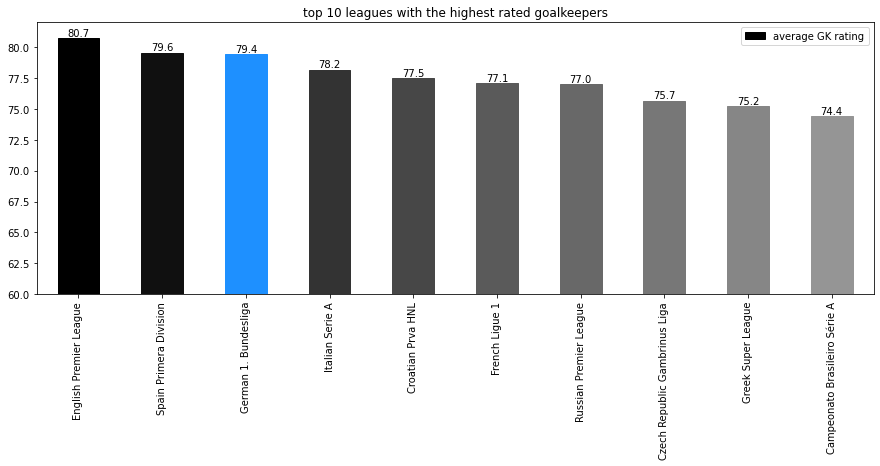

In [80]:
grouped=df.groupby("league_name").apply(lambda x:x[x["club_position"]=="GK"]["overall"].mean()).reset_index(name="overall").sort_values("overall",ascending=False).head(10)
cmap=plt.get_cmap("Greys")
colors=list(cmap(np.linspace(1,0.5,len(grouped["league_name"]))))
colors[2]="dodgerblue"
ax=grouped.plot(kind="bar",figsize=(15,5),title="top 10 leagues with the highest rated goalkeepers",\
             x="league_name",xlabel="",legend=True,color=colors)
def value_labels(y):
    for i in range(len(y)):
        plt.text(i,round(y.iloc[i],1),round(y.iloc[i],1),size=10,ha="center",va="bottom")
value_labels(grouped.overall)
plt.ylim(60,82)
for i,c in zip(range(0, 10),colors):
    ax.get_children()[i].set_color(c)
#or color=[color for color in colors]
plt.legend(["average GK rating"])
plt.show()

# plot average overall and average potential ratings by age

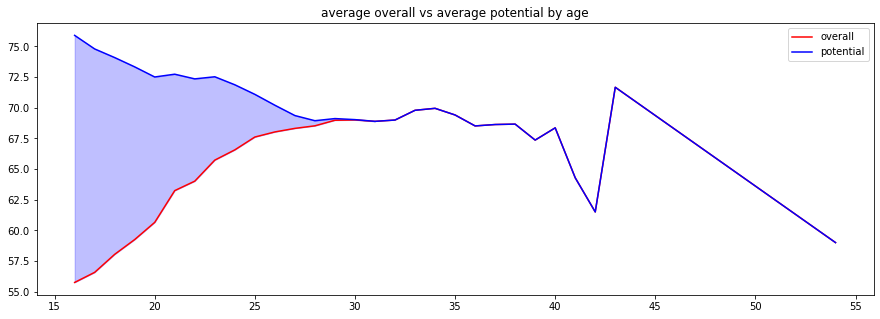

In [104]:
grouped=df.groupby("age").agg({"overall":"mean","potential":"mean","short_name":"count"}).reset_index().sort_values("age")
plt.figure(figsize=(15,5))
plt.plot(grouped["age"],grouped["overall"],color="r",label="overall")
plt.plot(grouped["age"],grouped["potential"],color="b",label="potential")
plt.title("average overall vs average potential by age")
plt.fill_between(grouped.age,grouped.overall,grouped.potential,
                where=(grouped.overall>grouped.potential),color="r",interpolate=True,alpha=.25)
plt.fill_between(grouped.age,grouped.overall,grouped.potential,
                where=(grouped.overall<grouped.potential),color="b",interpolate=True,alpha=.25)
plt.legend()
plt.show()

# find top 5 footballers in each league and thier clubs, having footballer's rating is more than 80

C:\Users\berid\AppData\Local\Temp\ipykernel_6584\1037631809.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.bar(grouped[grouped.league_name==l].short_name,grouped[grouped.league_name==l].overall,color=[rgb],label=l)


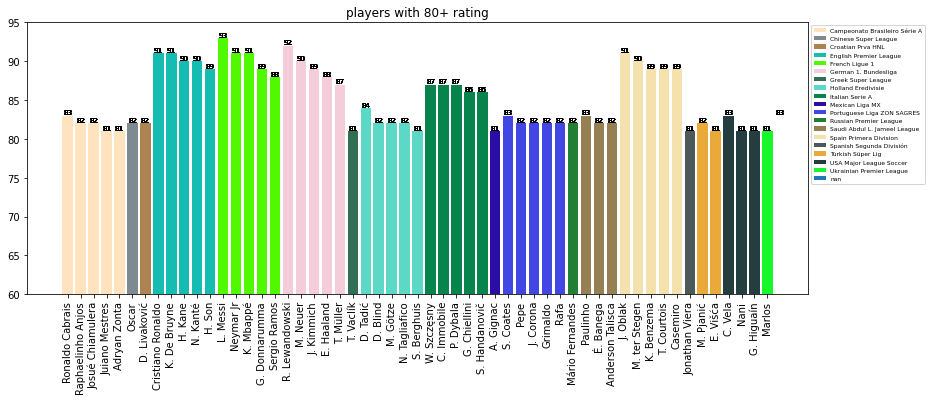

In [257]:
import random
leagues=grouped.league_name.unique()
plt.figure(figsize=(14,5))
for l in leagues:
    rgb = (random.random(), random.random(), random.random())
    plt.bar(grouped[grouped.league_name==l].short_name,grouped[grouped.league_name==l].overall,color=[rgb],label=l)
    plt.xticks(rotation=90)
    plt.title("players with 80+ rating")
    plt.legend(bbox_to_anchor=(1,1),fontsize=6)
    def value_labels(y):
        for i in range(len(y)):
            plt.text(i,round(y.iloc[i]),round(y.iloc[i]),size=7,ha="center",va="bottom",rotation=0)
    value_labels(grouped.overall)
    plt.ylim(60,95)
plt.show()